# Linear Regression

Is a method used to define a relationship between a dependent variable (Y) and independent variable (X). Which is simply written as: 

                                                          
### y = mx +b

## Importing 

Import the necessary libraries  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## Downloading the dataset

The dataset that's gonna be used is the information of houses to determine the price of them.

In [2]:
dataset = pd.read_csv(r'C:\Users\lexdy\Desktop\MachineLearningGoogle\DataSets\housingdata.csv')

print('The shape (or the dimensions) of the data set are:', dataset.shape , '\n')
print('And the head of the dataset is:')
dataset.head()

The shape (or the dimensions) of the data set are: (505, 14) 

And the head of the dataset is:


,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


### Columns names

Adding the corresponding names to the columns.
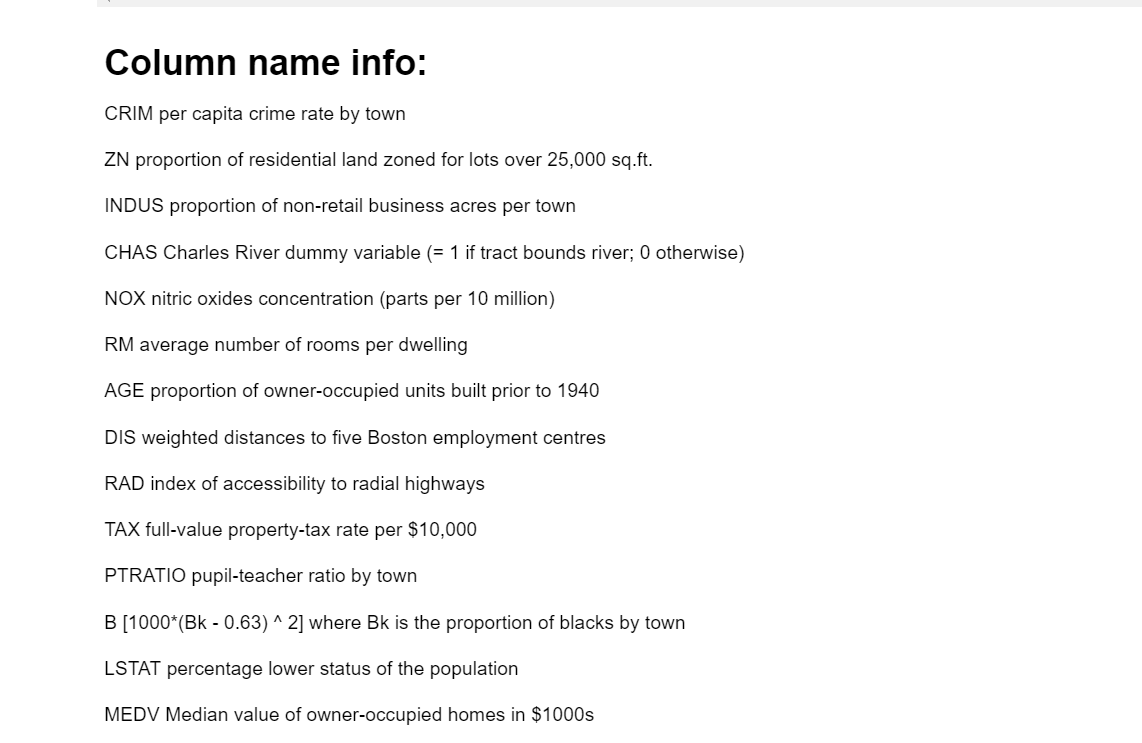

In [3]:
housing_colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset.columns = housing_colnames 
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


### Data Visualization 

#### Missing data
Lets check if there is any missing data inside of the dataset.

In [4]:
print('The missing files on each feature is:')
dataset.isnull().sum()

The missing files on each feature is:


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

No missing values.

#### Graphs

For better understand the relationship between each feature and the lable, we are going to graph each feature with the MEDV.

In [5]:
def plotFeatures(col_list, title):
    plt.figure(figsize=(13,16))
    i = 0
    for col in col_list:
        i+=1
        plt.subplot(7,2,i)
        plt.plot(dataset[col],dataset["MEDV"],marker='.',linestyle='none')
        plt.title(title % (col)) 
        plt.tight_layout()

Representation of the relationship between each feature and the value of the house.


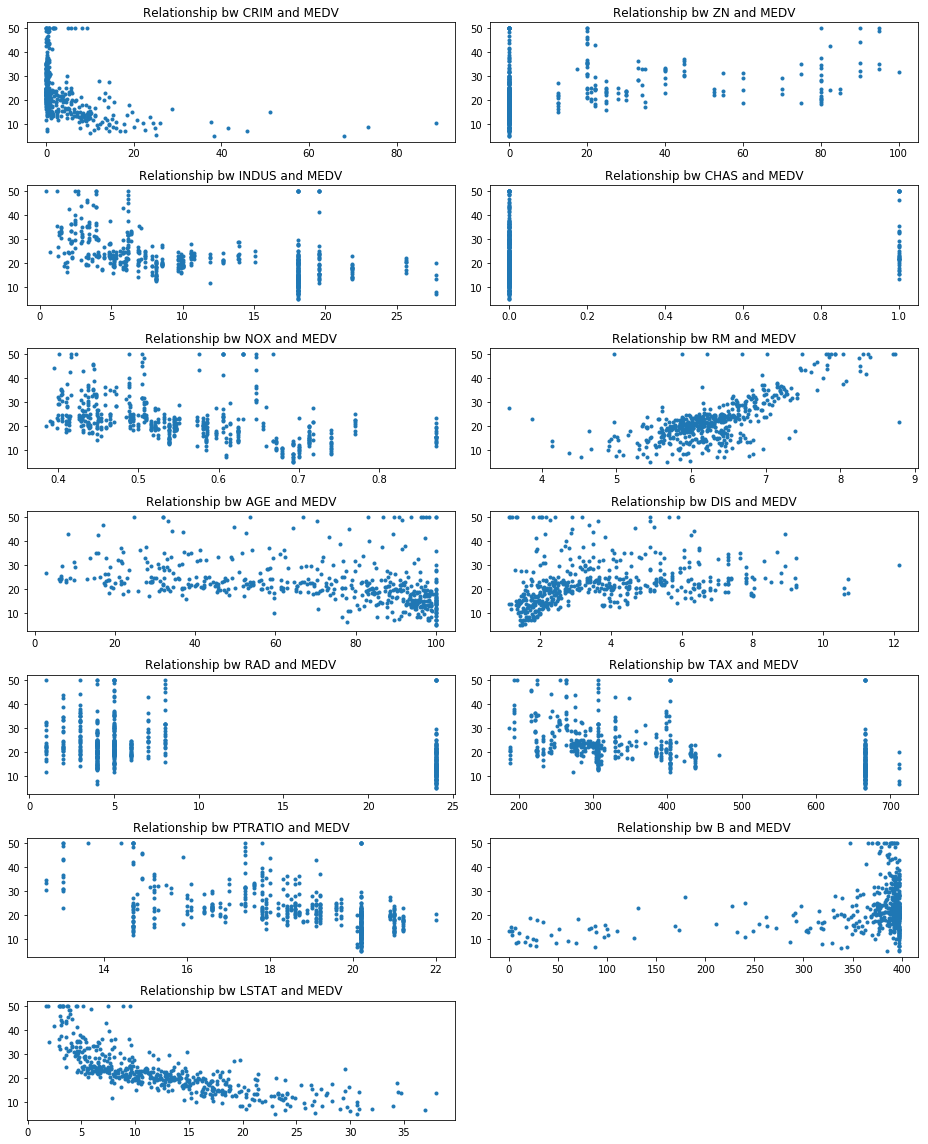

In [6]:
col_names = housing_colnames[:-1]

print('Representation of the relationship between each feature and the value of the house.')
plotFeatures(col_names, "Relationship bw %s and MEDV")

We can see that the most lineal relationship we have is the one with RM (Rooms per house).

[]

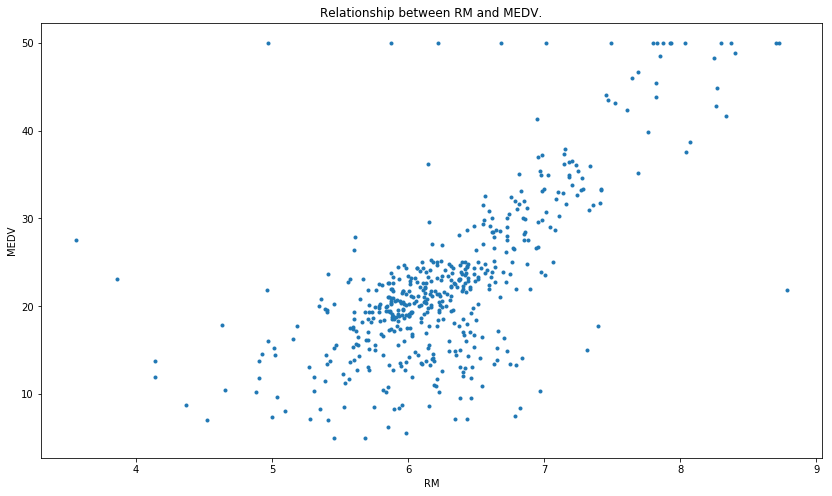

In [7]:
fig = plt.figure(figsize=(14,8))
plt.plot(dataset['RM'], dataset['MEDV'], marker= '.' , linestyle = 'none')
plt.title('Relationship between RM and MEDV.')
plt.ylabel('MEDV')
plt.xlabel('RM')
plt.plot()

### Model of Linear Regression 

#### Prediction and Cost Function
Lets start by making the fuction for the prediction and the Cost Function.

We are going to divide the Cost Function by 2 to make the mathemathic easier.

In [8]:
def predictPrice(x,theta):
    return np.dot(x,theta)

def calculateCost(x,theta,Y):
    prediction = predictPrice(x,theta)
    return ((prediction - Y)**2).mean()/2

#### Graphing function
Abline is the fucntion that is gonna graph the slope of the Logistic Regression every said amount of times.


In [9]:
def abline(x, theta, Y):
    y_vals = predictPrice(x, theta)
    plt.xlim(0, 20)
    plt.ylim(-10,60)
    plt.xlabel('Numbers of room in the house')
    plt.ylabel('Median value of the house')
    plt.gca().set_aspect(0.1, adjustable= 'datalim')
    plt.plot(x, Y, '.',x,y_vals,'-')
    plt.show()

#### Gradient Descent model

Now we make the model for the Linear Regression that uses the Gradietn Descent.

In [10]:
def gradientDescentLinearRegression(alpha=0.047,iter=10000):
    theta0 = []
    theta1 = []
    costs = []
    predictor = dataset["RM"]
    x = np.column_stack((np.ones(len(predictor)),predictor))
    Y = dataset["MEDV"]
    theta = np.zeros(2)
    for i in range(iter):
        pred = predictPrice(x,theta)
        t0 = theta[0] - alpha *(pred - Y).mean()
        t1 = theta[1] - alpha *((pred - Y)* x[:,1]).mean()
        
        theta = np.array([t0,t1])
        J = calculateCost(x,theta,Y)
        theta0.append(t0)
        theta1.append(t1)
        costs.append(J)
        if i%1000==0:
            print(f"Iteration: {i+1},Cost = {J},theta = {theta}")
            abline(x,theta,Y)
    print(f'theta0 = {len(theta0)}\ntheta1 = {len(theta1)}\nCosts = {len(costs)}')

Iteration: 1,Cost = 257.9036731705649,theta = [1.05890535 6.86537633]


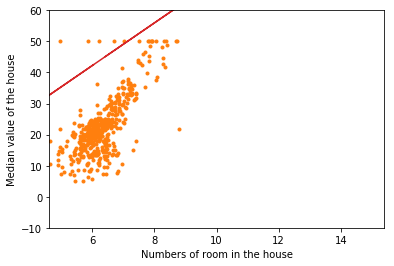

Iteration: 1001,Cost = 24.308279584732883,theta = [-14.68657755   5.96067994]


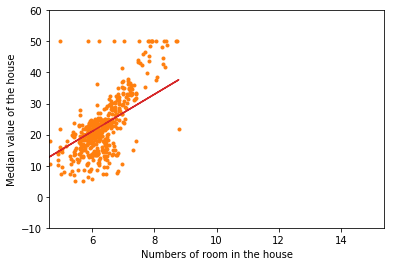

Iteration: 2001,Cost = 22.636692858625143,theta = [-23.32980984   7.31953446]


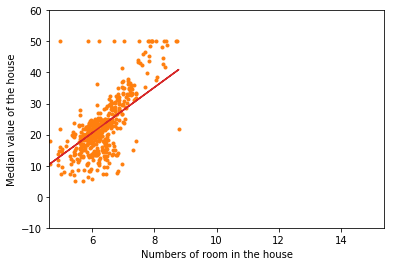

Iteration: 3001,Cost = 22.098102073291574,theta = [-28.23596397   8.09086046]


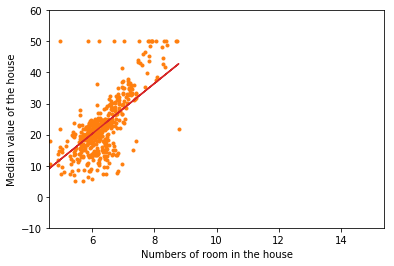

Iteration: 4001,Cost = 21.92456633654779,theta = [-31.02084207   8.52868789]


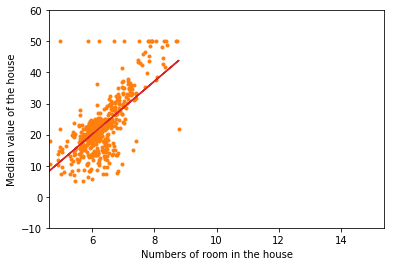

Iteration: 5001,Cost = 21.86865254680749,theta = [-32.60162119   8.77721168]


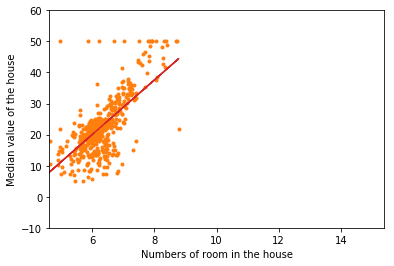

Iteration: 6001,Cost = 21.850636938369792,theta = [-33.49891815   8.91828113]


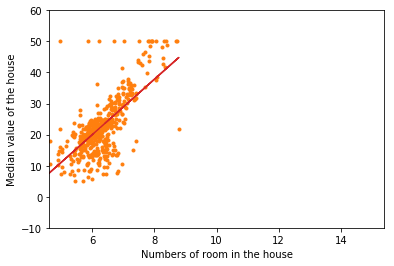

Iteration: 7001,Cost = 21.844832249600035,theta = [-34.00825043   8.99835632]


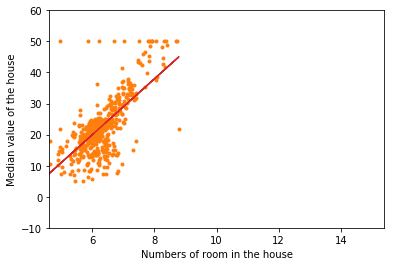

Iteration: 8001,Cost = 21.84296195963284,theta = [-34.29736248   9.04380936]


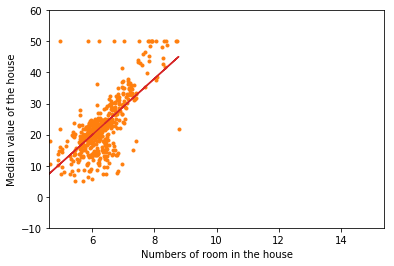

Iteration: 9001,Cost = 21.84235934600443,theta = [-34.46147103   9.06960986]


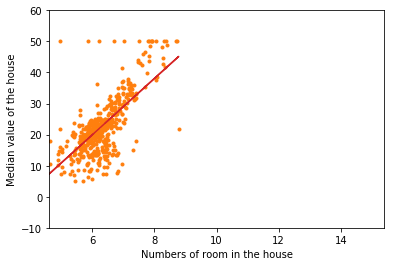

theta0 = 10000
theta1 = 10000
Costs = 10000


In [11]:
gradientDescentLinearRegression()